<a href="https://colab.research.google.com/github/Elui17/Quantum-rings/blob/main/Energias_en_punto_gamma_y_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

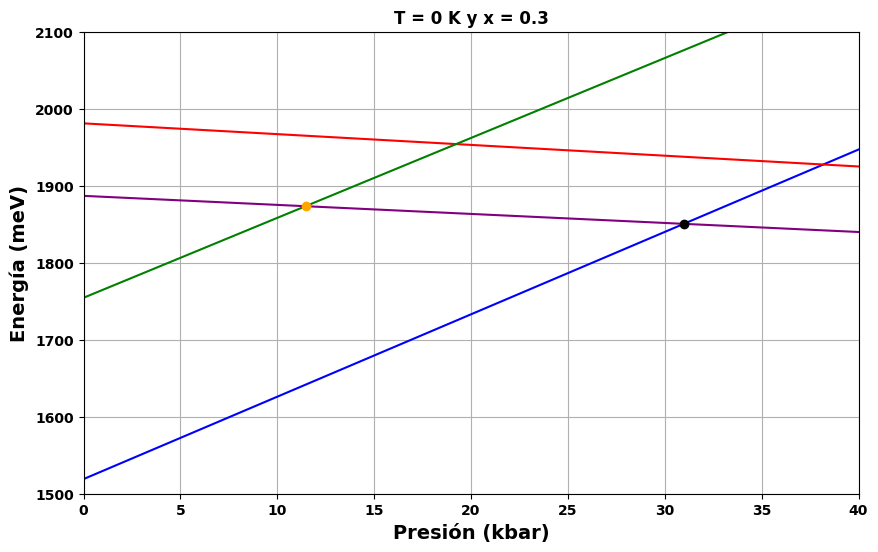

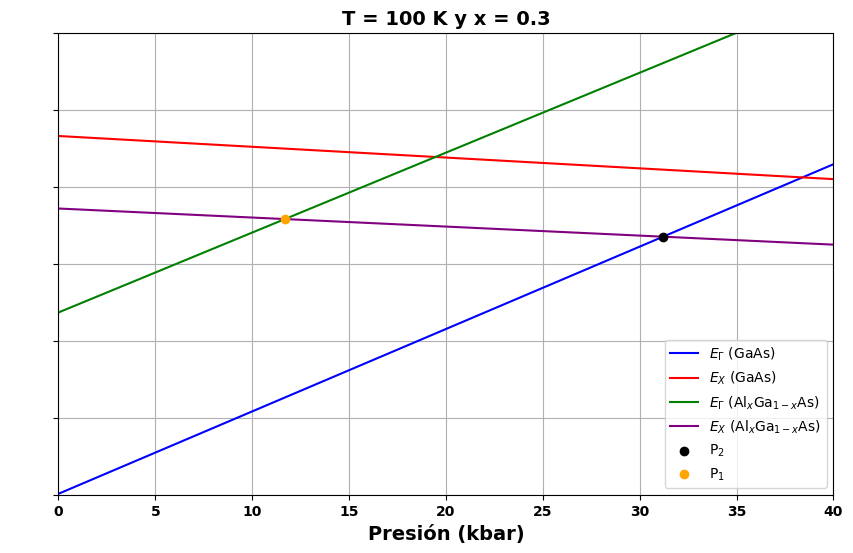

In [ ]:
# Recorriendo el código con las correcciones hechas
import numpy as np
import matplotlib.pyplot as plt

# Definimos los valores para x=0.3
x = 0.3

# Valores de presión (en GPa)
P = np.linspace(0, 4, 500)  # rango de presiones de 0 a kbar GPa

# Parámetros constantes
c = 204

# Parámetro Q para el band offset
Q = 0.62

# Temperaturas a considerar
T_0 = 0
T_100 = 100

# Función para calcular la energía corregida
def energia_con_correccion(T, e_i, b_i, a_i, P, c=204):
    return e_i + b_i * P + (a_i * T**2) / (T + c)

# Energías para T = 0 K
E1_T0 = energia_con_correccion(T_0, 1519, 107, -0.5405, P)
E2_T0 = energia_con_correccion(T_0, 1981, -14, -0.460, P)
E3_T0 = energia_con_correccion(T_0, 1519 + 1155 * x + 370 * x**2, 108 - 32 * x + 38 * x**2, -0.5405, P)
E4_T0 = energia_con_correccion(T_0, 1981 + 124 * x + 144 * x**2, -14 + x, -0.460, P)

# Energías para T = 100 K
E1_T100 = energia_con_correccion(T_100, 1519, 107, -0.5405, P)
E2_T100 = energia_con_correccion(T_100, 1981, -14, -0.460, P)
E3_T100 = energia_con_correccion(T_100, 1519 + 1155 * x + 370 * x**2, 108 - 32 * x + 38 * x**2, -0.5405, P)
E4_T100 = energia_con_correccion(T_100, 1981 + 124 * x + 144 * x**2, -14 + x, -0.460, P)

# Función para aplicar la corrección usando las ecuaciones dadas
def energia_corregida(Q, E3, E4, E1):
    E3_corr = E3 - (1 - Q) * (E3 - E1)
    E4_corr = E4 - (1 - Q) * (E3 - E1)
    return E3_corr, E4_corr

# Aplicamos la corrección usando las ecuaciones dadas
E3_corr_T0, E4_corr_T0 = energia_corregida(Q, E3_T0, E4_T0, E1_T0)
E3_corr_T100, E4_corr_T100 = energia_corregida(Q, E3_T100, E4_T100, E1_T100)

# Función para encontrar los puntos de intersección entre dos curvas
def encontrar_intersecciones(x, y1, y2):
    # Buscamos los puntos donde la diferencia cambia de signo (corte)
    idx = np.where(np.diff(np.sign(y1 - y2)))[0]
    intersecciones_x = []
    intersecciones_y = []
    for i in idx:
        # Interpolamos para encontrar una mejor aproximación del punto de intersección
        x_int = x[i] - (y1[i] - y2[i]) * (x[i+1] - x[i]) / (y1[i+1] - y1[i] - (y2[i+1] - y2[i]))
        y_int = y1[i] + (x_int - x[i]) * (y1[i+1] - y1[i]) / (x[i+1] - x[i])
        intersecciones_x.append(x_int)
        intersecciones_y.append(y_int)
    return intersecciones_x, intersecciones_y

# Encontramos las intersecciones para las curvas a T = 100 K con corrección
interseccion_1_x, interseccion_1_y = encontrar_intersecciones(P*10, E1_T100, E4_corr_T100)
interseccion_2_x, interseccion_2_y = encontrar_intersecciones(P*10, E4_corr_T100, E3_corr_T100)

# Encontramos las intersecciones para las curvas a T = 0 K
interseccion_11_x, interseccion_11_y = encontrar_intersecciones(P*10, E1_T0, E4_corr_T0)
interseccion_22_x, interseccion_22_y = encontrar_intersecciones(P*10, E4_corr_T0, E3_corr_T0)

# Graficamos las energías corregidas para T = 0 K
plt.figure(figsize=(10, 6))

plt.plot(P*10, E1_T0, label=r"$E_{\Gamma}$ (GaAs)", color='blue')
plt.plot(P*10, E2_T0, label=r"$E_{X}$ (GaAs)", color='red')
plt.plot(P*10, E3_corr_T0, label=r"$E_{\Gamma}$ (Al$_{x}$Ga$_{1-x}$As)", color='green')
plt.plot(P*10, E4_corr_T0, label=r"$E_{X}$ (Al$_{x}$Ga$_{1-x}$As)", color='purple')

# Mostramos los puntos de intersección
plt.scatter(interseccion_11_x, interseccion_11_y, color='black', zorder=5, label='P2')
plt.scatter(interseccion_22_x, interseccion_22_y, color='orange', zorder=5, label='P1')

plt.title("T = 0 K y x = 0.3", fontweight='bold')
plt.xlabel("Presión (kbar)", fontweight='bold', fontsize=14)
plt.ylabel("Energía (meV)", fontweight='bold', fontsize=14)
#plt.legend()
# Números de los ejes en negrita
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(True)
plt.xlim([0, 40])
plt.ylim([1500, 2100])

plt.show()

# Graficamos las energías corregidas para T = 100 K y señalamos las intersecciones
plt.figure(figsize=(10, 6))

plt.plot(P*10, E1_T100, label=r"$E_{\Gamma}$ (GaAs)", color='blue')
plt.plot(P*10, E2_T100, label=r"$E_{X}$ (GaAs)", color='red')
plt.plot(P*10, E3_corr_T100, label=r"$E_{\Gamma}$ (Al$_{x}$Ga$_{1-x}$As)", color='green')
plt.plot(P*10, E4_corr_T100, label=r"$E_{X}$ (Al$_{x}$Ga$_{1-x}$As)", color='purple')

# Mostramos los puntos de intersección
plt.scatter(interseccion_1_x, interseccion_1_y, color='black', zorder=5, label='P$_{2}$')
plt.scatter(interseccion_2_x, interseccion_2_y, color='orange', zorder=5, label='P$_{1}$')

plt.title("T = 100 K y x = 0.3", fontweight='bold', fontsize=14)
plt.xlabel("Presión (kbar)", fontweight='bold', fontsize=14)
plt.ylabel("")
plt.legend()
# Números de los ejes en negrita
plt.xticks(fontweight='bold')
plt.yticks(color='white', fontweight='bold') # Oculta solo los números del eje y, manteniendo el eje y visible

# Activa la cuadrícula solo en el eje y
plt.grid(True)  # Estilo de cuadrícula opcional '--'
plt.xlim([0, 40])
plt.ylim([1500, 2100])

plt.show()
